In [2]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from src.config import PROCESSED_DATA_DIR, INTERIM_DATA_DIR
from sklearn.model_selection import train_test_split

input_path: Path = INTERIM_DATA_DIR / "trainset.csv"

df_train = pd.read_csv(str(input_path), index_col=0)

df_train.info()

2024-10-10 10:20:50.013 | INFO     | dbos.config:<module>:14 - PROJ_ROOT path is: G:\Work\DS\dont-bet-on-sports


<class 'pandas.core.frame.DataFrame'>
Index: 5427 entries, 4563 to 860
Data columns (total 46 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   game_id           5427 non-null   object 
 1   season            5427 non-null   int64  
 2   game_type         5427 non-null   object 
 3   week              5427 non-null   int64  
 4   gameday           5427 non-null   object 
 5   weekday           5427 non-null   object 
 6   gametime          5232 non-null   object 
 7   away_team         5427 non-null   object 
 8   away_score        5427 non-null   float64
 9   home_team         5427 non-null   object 
 10  home_score        5427 non-null   float64
 11  location          5427 non-null   object 
 12  result            5427 non-null   float64
 13  total             5427 non-null   float64
 14  overtime          5427 non-null   float64
 15  old_game_id       5427 non-null   int64  
 16  gsis              5427 non-null   int64  
 17

In [3]:
df_train.describe()

,season,week,away_score,home_score,result,total,overtime,old_game_id,gsis,pff,...,home_moneyline,spread_line,away_spread_odds,home_spread_odds,total_line,under_odds,over_odds,div_game,temp,wind
count,5427.000000,5427.000000,5427.000000,5427.000000,5427.000000,5427.000000,5427.000000,5.427000e+03,5427.000000,3448.000000,...,3859.000000,5427.000000,3859.000000,3859.000000,5427.000000,3857.000000,3857.000000,5427.000000,3926.000000,3926.000000
mean,2011.307168,9.503593,20.858670,23.042012,2.183343,43.900682,0.060070,2.011482e+09,43109.528285,6181.551624,...,-128.253434,2.267275,-54.625551,-55.157813,43.442325,-69.448794,-78.436349,0.375898,58.086857,8.548650
std,7.301154,5.337601,10.056316,10.290746,14.580019,14.194397,0.237638,7.316398e+06,18741.388547,6050.541014,...,327.442694,5.932281,92.793608,92.633207,4.935195,80.201452,72.276007,0.484399,16.965153,5.441108
min,1999.000000,1.000000,0.000000,0.000000,-49.000000,3.000000,0.000000,1.999091e+09,589.000000,732.000000,...,-5000.000000,-18.000000,-137.000000,-146.000000,28.500000,-123.000000,-125.000000,0.000000,2.000000,0.000000
25%,2005.000000,5.000000,14.000000,16.000000,-7.000000,34.000000,0.000000,2.005111e+09,28664.500000,2041.750000,...,-270.000000,-3.000000,-110.000000,-110.000000,40.000000,-109.000000,-110.000000,0.000000,46.000000,5.000000
50%,2011.000000,10.000000,20.000000,23.000000,3.000000,43.000000,0.000000,2.011122e+09,55383.000000,3430.000000,...,-155.000000,3.000000,-105.000000,-105.000000,43.500000,-105.000000,-106.000000,0.000000,59.000000,8.000000
75%,2018.000000,14.000000,27.000000,30.000000,10.000000,53.000000,0.000000,2.018092e+09,57611.500000,9350.250000,...,131.000000,6.500000,100.000000,100.000000,47.000000,-102.000000,-102.000000,1.000000,71.000000,11.000000
max,2024.000000,22.000000,59.000000,70.000000,59.000000,106.000000,1.000000,2.024101e+09,59585.000000,21535.000000,...,925.000000,27.000000,138.000000,126.000000,63.500000,113.000000,112.000000,1.000000,109.000000,71.000000


In [4]:
df_train.head()

,game_id,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,...,wind,away_qb_id,home_qb_id,away_qb_name,home_qb_name,away_coach,home_coach,referee,stadium_id,stadium
4563,2016_04_MIA_CIN,2016,REG,4,2016-09-29,Thursday,20:25,MIA,7.0,CIN,...,2.0,00-0029701,00-0027973,Ryan Tannehill,Andy Dalton,Adam Gase,Marvin Lewis,Bill Vinovich,CIN00,Paul Brown Stadium
6123,2021_18_LAC_LV,2021,REG,18,2022-01-09,Sunday,20:20,LAC,32.0,LV,...,NaN,00-0036355,00-0031280,Justin Herbert,Derek Carr,Brandon Staley,Rich Bisaccia,Clete Blakeman,VEG00,Allegiant Stadium
149,1999_11_NE_MIA,1999,REG,11,1999-11-21,Sunday,NaN,NE,17.0,MIA,...,8.0,00-0001361,00-0007835,Drew Bledsoe,Damon Huard,Pete Carroll,Jimmy Johnson,Ron Blum,MIA00,Pro Player Stadium
3892,2013_13_PIT_BAL,2013,REG,13,2013-11-28,Thursday,20:30,PIT,20.0,BAL,...,2.0,00-0022924,00-0026158,Ben Roethlisberger,Joe Flacco,Mike Tomlin,John Harbaugh,Clete Blakeman,BAL00,M&T Bank Stadium
5368,2019_04_KC_DET,2019,REG,4,2019-09-29,Sunday,13:00,KC,34.0,DET,...,NaN,00-0033873,00-0026498,Patrick Mahomes,Matthew Stafford,Andy Reid,Matt Patricia,Walt Anderson,DET00,Ford Field


Lets checkout the the spread of various data attributes using histograms

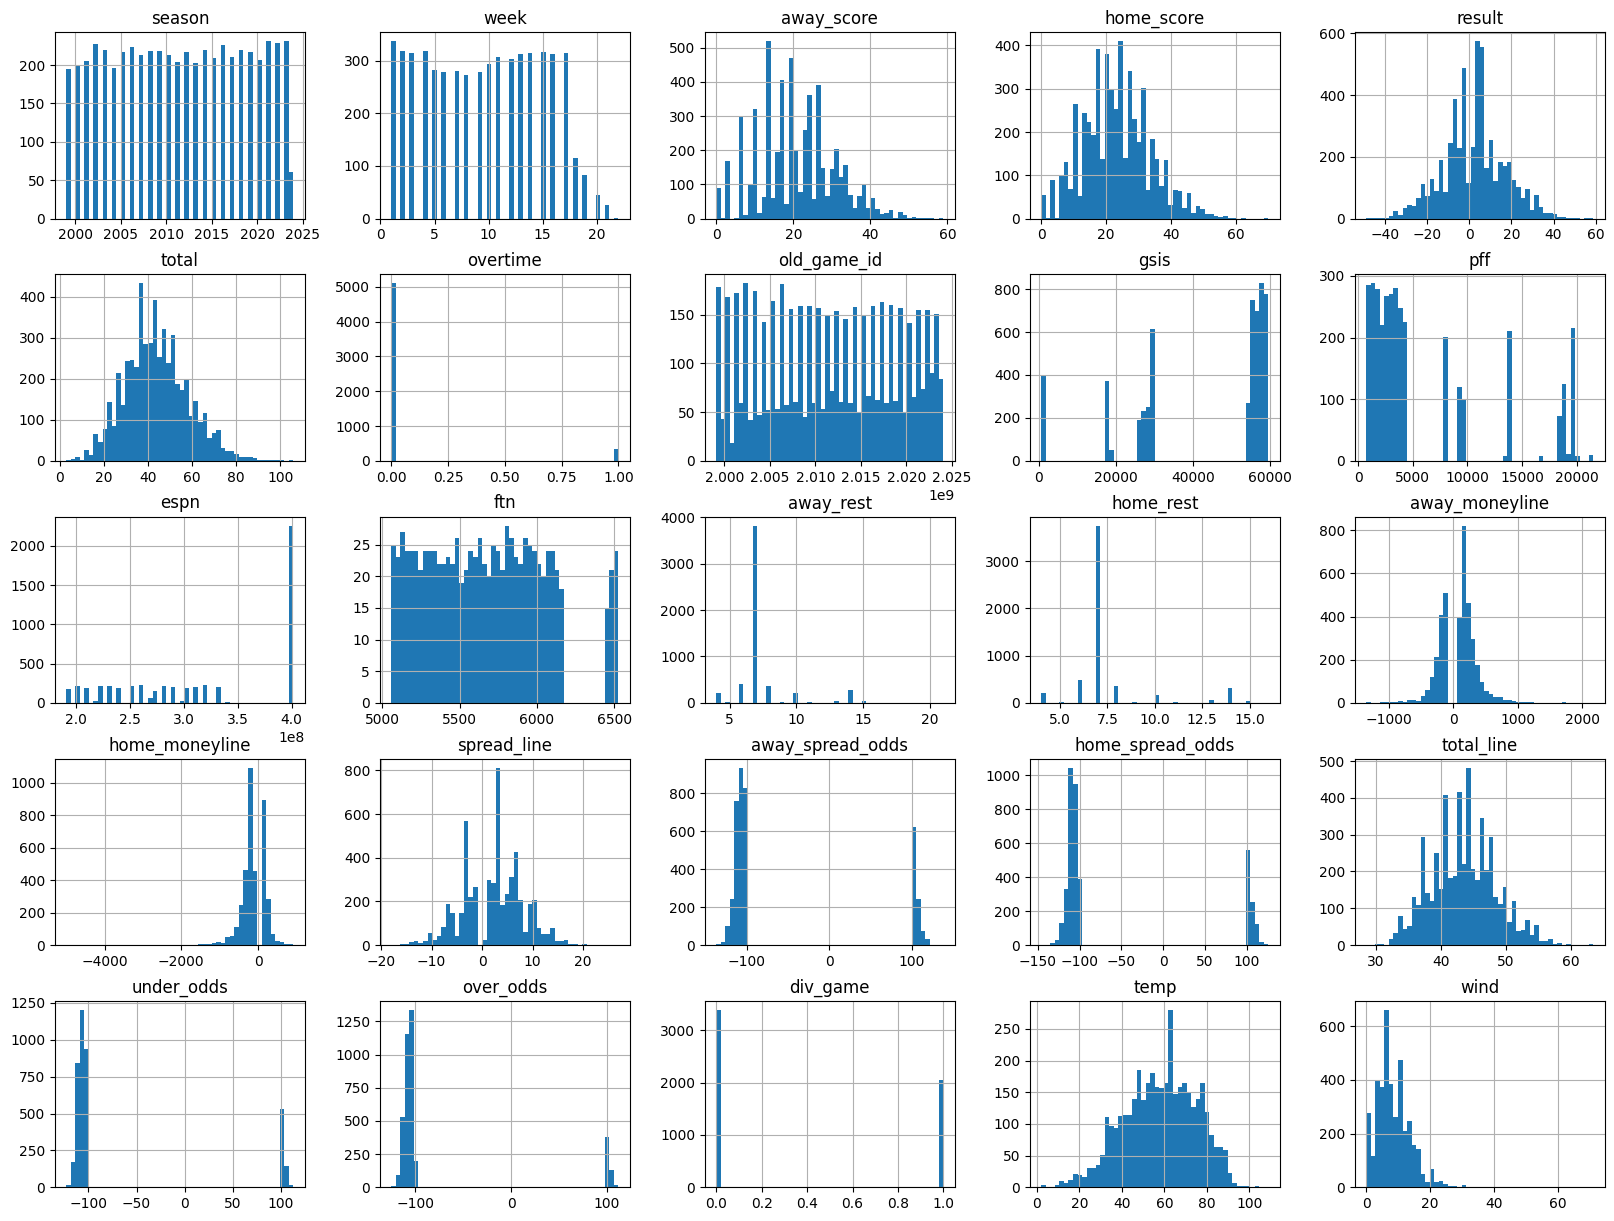

In [5]:
df_train.hist(bins=50,  figsize=(20,15))
plt.show()

## Missing Values

There is clearly some data missing for certain fields. Lets get a count of missing values and identify the columns that will need work

In [6]:
df_train.isnull().sum()

game_id                0
season                 0
game_type              0
week                   0
gameday                0
weekday                0
gametime             195
away_team              0
away_score             0
home_team              0
home_score             0
location               0
result                 0
total                  0
overtime               0
old_game_id            0
gsis                   0
nfl_detail_id       5205
pfr                    0
pff                 1979
espn                   0
ftn                 4484
away_rest              0
home_rest              0
away_moneyline      1568
home_moneyline      1568
spread_line            0
away_spread_odds    1568
home_spread_odds    1568
total_line             0
under_odds          1570
over_odds           1570
div_game               0
roof                   0
surface               37
temp                1501
wind                1501
away_qb_id             5
home_qb_id             5
away_qb_name           5


### Notable missing values for columns:
1. moneyline and spread odds - Betting fields like money_line and under/over_odds carry a lot of weight as they are generated by bookmakers through their own complex analysis. Moneyline data would be very valuable to have and would complete the betting data of spread and total.
2. temp, wind - Looking at the dataset reference we find that temp and wind values have only been reported for outdoor and open roof stadiums. Still we would have to handle them for indoor(closed and dome) stadiums

### Handling Missing Data and Removing Irrelevant Fields

| Column | Action |
| ------ | ------ |
| gametime: The kickoff time of the game. This is represented in 24-hour time and the Eastern time zone, regardless of what time zone the game was being played in. | Could be useful, filling with mode values |
|away_score, home_score, total, result, overtime, spread_line, total_line|These are all null for the planned fixtures, we removed these rows at the first step. Drop these from our dataset and store them separately for real-world test set|
|pff: The id of the game issued by Pro Football Focus. Similar to pfr, espn, ftn|pff, pfr, espn, ftn could be useful to get more data from one of the providers, however we don't need it currently, so dropping those columns|
|nfl_detail_id, old_game_id, game_id| We will be using gsis (The id of the game issued by the NFL Game Statistics & Information System) for game ids, hence these can be dropped|
|money_line and under/over_odds|Until we have money_line data as well, it would be better to drop these columns as they will carry a lot of weight in the final classifications and predictions|
|away_qb_id, home_qb_id, away_qb_name, home_qb_name, referee| These columns have very few (<10) values missing, dropping the missing values|
|surface|A quick look at the value counts of surface show that the games are played majorly on grass. This plus the low count of missing values means that we are going to fill them with the mode i.e grass|
|temp, wind|These are missing for domed/indoor stadiums only. These stadiums have HVAC systems to maintain a comfortable temperature for the fans and players alike. Further research shows that on average these stadiums are temperature controlled to anywhere between 65 to 75 degrees (in freedom units, unfortunately). We will fill the missing temperature values with random values within an extended range of 65-75. Referring to temp histogram plotted previously, we can see that these values will lie on the warmer end of the distribution, which makes sense for the comfort of players and fans. As for winds, it can be reasonably assumed that closed stadiums will have very less to no winds, so we will fill values within a range of 0-2, which is already a case for a lot of games, as can be seen by the previously plotted wind histogram|

In [7]:
df_train['gametime'] = df_train['gametime'].fillna(df_train['gametime'].mode()[0])

#Removing certain columns based on logic mentioned in EDA notebook
df_train = df_train.drop(columns=['pfr', 'pff', 'espn', 'ftn', 'nfl_detail_id' , 'old_game_id' , 'game_id', 'away_moneyline', 'home_moneyline', 'away_spread_odds', 'home_spread_odds', 'under_odds', 'over_odds'])
df_train = df_train.dropna(subset=['away_qb_id', 'home_qb_id', 'away_qb_name', 'home_qb_name', 'referee'])
df_train.isnull().sum()


season             0
game_type          0
week               0
gameday            0
weekday            0
gametime           0
away_team          0
away_score         0
home_team          0
home_score         0
location           0
result             0
total              0
overtime           0
gsis               0
away_rest          0
home_rest          0
spread_line        0
total_line         0
div_game           0
roof               0
surface           36
temp            1496
wind            1496
away_qb_id         0
home_qb_id         0
away_qb_name       0
home_qb_name       0
away_coach         0
home_coach         0
referee            0
stadium_id         0
stadium            0
dtype: int64

In [8]:
#if no surface is given, assume grass
df_train['surface'].value_counts()
df_train['surface'] = df_train['surface'].fillna(df_train['surface'].mode()[0])

In [9]:
df_train[['temp', 'wind']].describe()

,temp,wind
count,3925.000000,3925.000000
mean,58.087134,8.547006
std,16.967305,5.440827
min,2.000000,0.000000
25%,46.000000,5.000000
50%,59.000000,8.000000
75%,71.000000,11.000000
max,109.000000,71.000000


In [10]:
#filling domed/indoor stadiums weather conditions within a range
df_train['temp'] = df_train['temp'].map(lambda t : t if not np.isnan(t) else float(np.random.randint(65., 76.)))
df_train['wind'] = df_train['wind'].map(lambda t : t if not np.isnan(t) else float(np.random.randint(0., 3.)))
df_train[['temp', 'wind']].describe()

,temp,wind
count,5421.000000,5421.000000
mean,61.363033,6.459878
std,15.471802,5.748424
min,2.000000,0.000000
25%,52.000000,2.000000
50%,66.000000,6.000000
75%,72.000000,10.000000
max,109.000000,71.000000


In [11]:
#no more missing values
df_train.isnull().sum()

season          0
game_type       0
week            0
gameday         0
weekday         0
gametime        0
away_team       0
away_score      0
home_team       0
home_score      0
location        0
result          0
total           0
overtime        0
gsis            0
away_rest       0
home_rest       0
spread_line     0
total_line      0
div_game        0
roof            0
surface         0
temp            0
wind            0
away_qb_id      0
home_qb_id      0
away_qb_name    0
home_qb_name    0
away_coach      0
home_coach      0
referee         0
stadium_id      0
stadium         0
dtype: int64

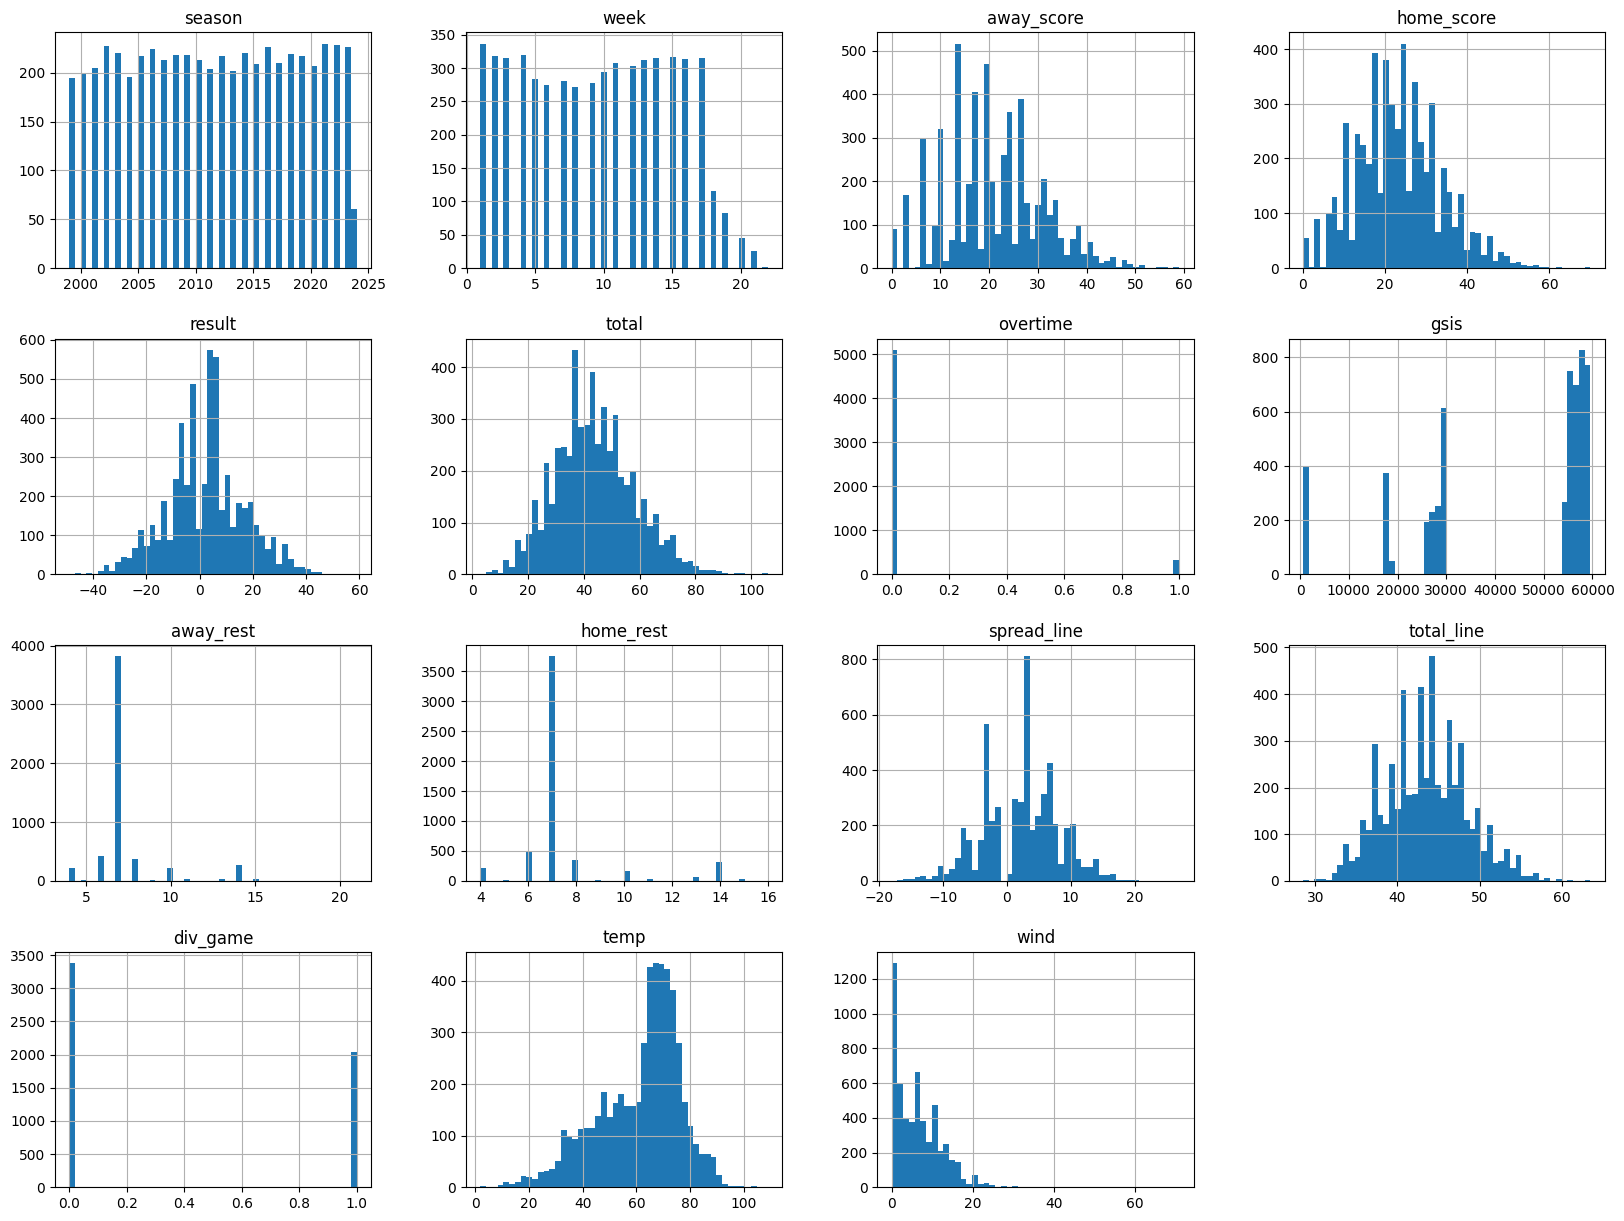

In [12]:
df_train.hist(bins=50,  figsize=(20,15))
plt.show()

# Feature Engineering

In [13]:
df_train.head()

,season,game_type,week,gameday,weekday,gametime,away_team,away_score,home_team,home_score,...,wind,away_qb_id,home_qb_id,away_qb_name,home_qb_name,away_coach,home_coach,referee,stadium_id,stadium
4563,2016,REG,4,2016-09-29,Thursday,20:25,MIA,7.0,CIN,22.0,...,2.0,00-0029701,00-0027973,Ryan Tannehill,Andy Dalton,Adam Gase,Marvin Lewis,Bill Vinovich,CIN00,Paul Brown Stadium
6123,2021,REG,18,2022-01-09,Sunday,20:20,LAC,32.0,LV,35.0,...,1.0,00-0036355,00-0031280,Justin Herbert,Derek Carr,Brandon Staley,Rich Bisaccia,Clete Blakeman,VEG00,Allegiant Stadium
149,1999,REG,11,1999-11-21,Sunday,13:00,NE,17.0,MIA,27.0,...,8.0,00-0001361,00-0007835,Drew Bledsoe,Damon Huard,Pete Carroll,Jimmy Johnson,Ron Blum,MIA00,Pro Player Stadium
3892,2013,REG,13,2013-11-28,Thursday,20:30,PIT,20.0,BAL,22.0,...,2.0,00-0022924,00-0026158,Ben Roethlisberger,Joe Flacco,Mike Tomlin,John Harbaugh,Clete Blakeman,BAL00,M&T Bank Stadium
5368,2019,REG,4,2019-09-29,Sunday,13:00,KC,34.0,DET,30.0,...,0.0,00-0033873,00-0026498,Patrick Mahomes,Matthew Stafford,Andy Reid,Matt Patricia,Walt Anderson,DET00,Ford Field
